## Regresión con Support Vector Machines (SVR)

## Importar Librerias

In [8]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## Generar un dataset sintético
Datos artificiales que simulan problemas de clasificación.

- n_samples=100: Genera 100 ejemplos (filas).
- n_features=1: Cada ejemplo tiene 1 sola característica (columna).
- noise=15: Agrega ruido gaussiano (error) al valor de salida y. Esto simula datos reales con imprecisiones.
- random_state=42: Fija la semilla aleatoria para que los datos generados sean siempre los mismos (reproducibilidad).


In [2]:
# Generar 100 muestras de 1 caracteristica. incluir ruido.
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

## Visualización de los datos

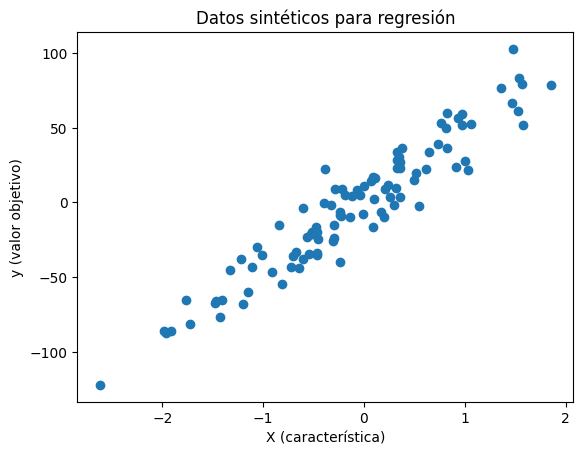

In [3]:
plt.scatter(X, y)
plt.title("Datos sintéticos para regresión")
plt.xlabel("X (característica)")
plt.ylabel("y (valor objetivo)")
plt.show()

# Dividir en entrenamiento y prueba

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Establecer el Pipeline de estandarización y clasificación

In [6]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR(kernel='rbf', C=100, epsilon=5))
])

## Entrenar el modelo

In [7]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVR(C=100, epsilon=5))])

## Evaluar

In [9]:
y_pred = pipe.predict(X_test)
print("Error absoluto medio (MAE):", mean_absolute_error(y_test, y_pred))
print("Error cuadrático medio (MSE):", mean_squared_error(y_test, y_pred))
print("Coeficiente R2:", r2_score(y_test, y_pred))

Error absoluto medio (MAE): 13.650261592915346
Error cuadrático medio (MSE): 245.16686600990388
Coeficiente R2: 0.8736601489447533


## Visualización de la curva de predicción

Error cuadrático medio (MSE): 245.16686600990388
Coeficiente R2: 0.8736601489447533


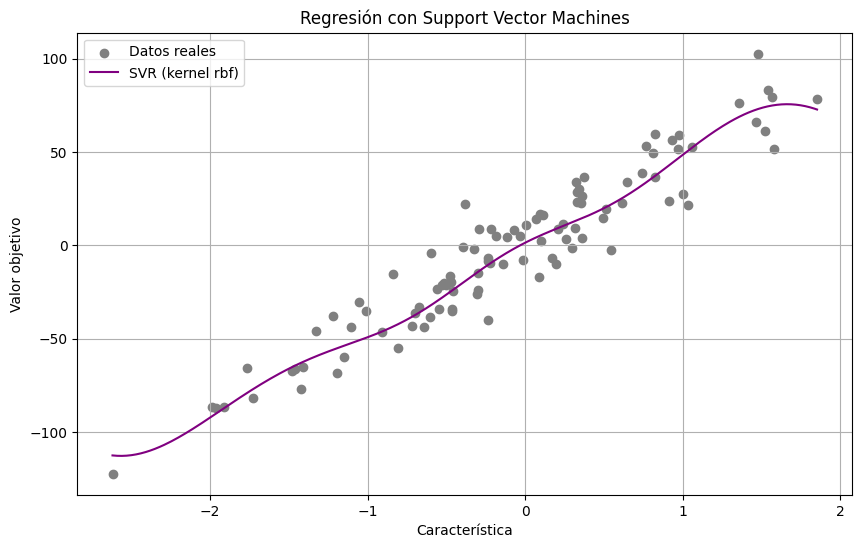

In [10]:
y_pred = pipe.predict(X_test)
print("Error cuadrático medio (MSE):", mean_squared_error(y_test, y_pred))
print("Coeficiente R2:", r2_score(y_test, y_pred))

# 5. Visualización de la curva de predicción
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_plot = pipe.predict(X_plot)

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='gray', label='Datos reales')
plt.plot(X_plot, y_plot, color='purple', label='SVR (kernel rbf)')
plt.title("Regresión con Support Vector Machines")
plt.xlabel("Característica")
plt.ylabel("Valor objetivo")
plt.legend()
plt.grid(True)
plt.show()

## Visualización del vecindario para un ejemplo.

In [11]:
index = 0 
punto_test = X_test[index].reshape(1, -1)
distancias = np.linalg.norm(X_train - punto_test, axis=1)
indices_vecinos = distancias.argsort()[:5] 
punto_predicho = pipe.predict(X_test[index].reshape(1, -1))[0]

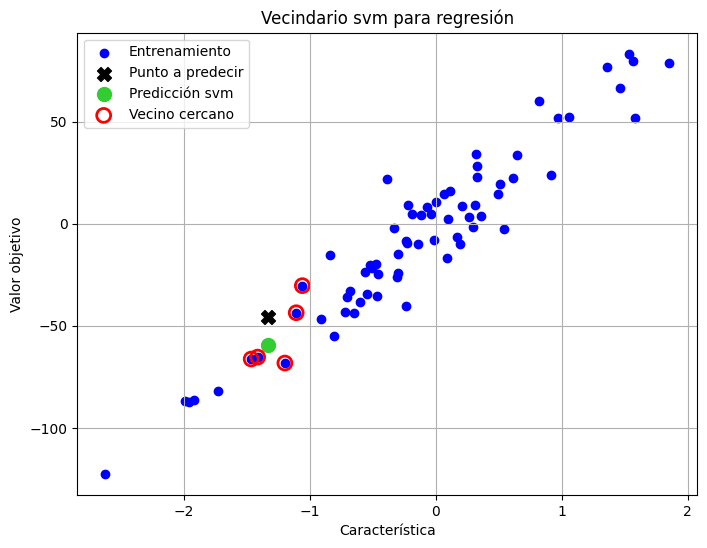

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_test[index], y_test[index], color='black', marker='X', s=100, label='Punto a predecir')
plt.scatter(X_test[index], punto_predicho, color='limegreen', marker='o', s=100, label='Predicción svm')
for i in indices_vecinos:
    plt.scatter(X_train[i], y_train[i], edgecolor='red', facecolor='none', s=100, linewidth=2, label='Vecino cercano' if i == indices_vecinos[0] else "")
plt.title("Vecindario svm para regresión")
plt.xlabel("Característica")
plt.ylabel("Valor objetivo")
plt.legend()
plt.grid(True)
plt.show()

## Ejercicios
- Probar diferentes kernels: 'linear', 'poly'.
- Modificar los hiperparámetros C y epsilon.